## Automatic Urban Resilience Metrics Identification

- **Appraoch** - 
Leverage the latest in Natural Language Processing (NLP) capabilities to automatically harvest, extract, categorize, and visualize Urban Resilience Metrics as defined by major worldwide cities.

- **Harvest** – Gather unstructured websites and openly available city urban resilience reports and content, and in particular how the cities define urban resilience metrics and how they plan on capturing data to populate these urban resilience metrics
- **Extract** – Leverage NLP capabilities to automatically extract definitions and categorizations of urban resilience metrics from these unstructured reports and websites.
- **Categorize** – Organize the resultant extracted content into common themes across all of the cities

Rockefeller Foundation conducted resilience research on 100 different cities. Cumulated in the 100RC_DataCollection.csv is a list of the reports released, manually gathered information. Using the NLP, using various NLP techniques, we'll look into what we can call as a universal metric.


In [155]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('100RC_DataCollection.xlsx')

# Display the first few rows of the DataFrame
df.head()

,Region,Country,City,Source,Other links,No source
0,Asia Pacific,India,Surat,https://resilientcitiesnetwork.org/downloadabl...,NaN,NaN
1,Asia Pacific,India,Pune,https://resilientcitiesnetwork.org/downloadabl...,NaN,NaN
2,Asia Pacific,India,Chennai,https://resilientcitiesnetwork.org/downloadabl...,https://resilientchennai.com/,NaN
3,Asia Pacific,China,Deyang,https://resilientcitiesnetwork.org/downloadabl...,NaN,NaN
4,Asia Pacific,China,Huangshi,https://resilientcitiesnetwork.org/downloadabl...,NaN,NaN


In [156]:
!pip install -q PyPDF2

In [157]:
!pip install -q requests

In [158]:
import requests
from PyPDF2 import PdfReader

def download_and_extract_text(url, output_pdf_file):
    # Download the file
    response = requests.get(url)
    with open(output_pdf_file, 'wb') as f:
        f.write(response.content)

    # Extract text from the downloaded PDF
    with open(output_pdf_file, 'rb') as f:
        reader = PdfReader(f)
        text = ''
        for page in reader.pages:
            text += page.extract_text()

    return text


In [159]:
url = 'https://resilientcitiesnetwork.org/downloadable_resources/Network/Surat-Resilience-Strategy-English.pdf'
output_pdf_file = 'Surat-Resilience-Strategy-English.pdf'

Surat_text = download_and_extract_text(url, output_pdf_file)
print(Surat_text)


A
Photograph Credit: Tejas Ghariwala, SuratSurat Resilience StrategySteered By:
Supported By: 
Strategic Partner: 
TARU Leading Edge Pvt. Ltd. , India
Special Credits:
Ms. S. Aparna, IAS, Former Municipal Commissioner, SMCMr. Manoj Kumar Das, IAS, Former Municipal Commissioner, SMC
Managed By : 
Surat Climate Change Trust (SCCT)Mr. M. Thennarasan, IAS, Commissioner, SMC & Chairman, SCCTMr. Jatin Shah, Advisor, SMC & Managing Trustee, SCCTMr. Jivan Patel, Dy. Commissioner, SMC & Trustee, SCCTMr. Chaitanya Bhatt, Dy. Commissioner, SMC & Trustee, SCCTMr. S. R. Mahakal, Superintendent Engineer, NWRWS & Trustee, SCCTMr. A. B. Patel, Director, GSDMA & Trustee, SCCTMr. B. S. Agrawal, President, SGCCI & Trustee, SCCTMr. P. M. Shah, Vice-President, SGCCI & Trustee, SCCTDr. S. R. Gandhi, Director, SVNIT & Trustee, SCCTMr. Kanti Bhanderi, Councillor, SMC & Trustee, SCCTMs. Vaishali Shah, Councillor, SMC & Trustee, SCCTDr. Vikas Desai, Trustee, SCCTMr. Kamlesh Yagnik, Trustee, SCCTDr. Akash Achary

In [160]:
# import requests

# # The URL of the file to be downloaded
# url = 'https://resilientcitiesnetwork.org/downloadable_resources/Network/Surat-Resilience-Strategy-English.pdf'

# # Send a GET request to the URL
# response = requests.get(url)

# # Write the content of the response to a file
# with open('Surat-Resilience-Strategy-English.pdf', 'wb') as file:
#     file.write(response.content)

In [161]:
# from PyPDF2 import PdfReader

# # Open the PDF file
# with open('Surat-Resilience-Strategy-English.pdf', 'rb') as file:
#     # Create a PDF file reader object
#     reader = PdfReader(file)

#     # Initialize an empty string to hold the extracted text
#     text = ''

#     # Loop through all the pages in the PDF file and extract the text
#     for page in reader.pages:
#         text += page.extract_text()

# # Now 'text' contains the extracted text from the PDF file
# text

# print(text)

In [162]:
!pip install -q nltk spacy textblob gensim matplotlib seaborn wordcloud geopandas bert-extractive-summarizer
 #library package

ERROR: Invalid requirement: '#library'


In [163]:
from summarizer import Summarizer

# Initialize the BERT summarizer
model = Summarizer()

# Summarize the Surat_text
summary = model(Surat_text, num_sentences=3) # You can adjust num_sentences to control the length of the summary

print("Summary of Surat Resilience Report:")
print(summary)


Summary of Surat Resilience Report:
A
Photograph Credit: Tejas Ghariwala, SuratSurat Resilience StrategySteered By:
Supported By: 
Strategic Partner: 
TARU Leading Edge Pvt. Short Term (2017-2018) TIMELINE  Migration influx
  Insufficient transport network
  Less regulation and enforcementShocks and Stresses
New
Da Nang, Mexico City, New York
5.3.1 STRATEGY LINKAGES22BRIEF
The city will conduct a detailed road accident study, which will 
be aimed at identifying existing hotspots for accidents. Surat is also known for its knowledge 
and experience in managing malaria cases.


#### NLTK model - Preprocessing

In [164]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize a WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a list of stopwords to be removed from the text
stop_words = set(stopwords.words('english'))

# Tokenize the text into sentences
sentences = sent_tokenize(Surat_text)

# Initialize an empty list to hold the preprocessed sentences
preprocessed_sentences = []

# Loop through each sentence
for sentence in sentences:
    # Remove punctuation and convert to lowercase
    sentence = sentence.translate(str.maketrans('', '', string.punctuation)).lower()

    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Remove stopwords and lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Add the preprocessed sentence to the list
    preprocessed_sentences.append(' '.join(words))

# Now 'preprocessed_sentences' contains the preprocessed text
preprocessed_sentences

print(preprocessed_sentences)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['photograph credit tejas ghariwala suratsurat resilience strategysteered supported strategic partner taru leading edge pvt', 'ltd india special credit m aparna ia former municipal commissioner smcmr', 'manoj kumar da ia former municipal commissioner smc managed surat climate change trust scctmr thennarasan ia commissioner smc chairman scctmr', 'jatin shah advisor smc managing trustee scctmr', 'jivan patel dy', 'commissioner smc trustee scctmr', 'chaitanya bhatt dy', 'commissioner smc trustee scctmr', 'r mahakal superintendent engineer nwrws trustee scctmr', '', 'b patel director gsdma trustee scctmr', 'b agrawal president sgcci trustee scctmr', 'p shah vicepresident sgcci trustee scctdr', 'r gandhi director svnit trustee scctmr', 'kanti bhanderi councillor smc trustee scctms', 'vaishali shah councillor smc trustee scctdr', 'vikas desai trustee scctmr', 'kamlesh yagnik trustee scctdr', 'akash acharya nominee centre social study team composition jatin shah adviser smc managing trustee s

In [165]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Spacy resilience metric

In [166]:
import spacy
from spacy.matcher import Matcher

# Load the Spacy model
nlp = spacy.load('en_core_web_sm')

# Initialize a Spacy Matcher
matcher = Matcher(nlp.vocab)

# Define patterns for the resilience metrics
patterns = [
    [{'LOWER': 'healthcare'}, {'LOWER': 'facilities'}],
    [{'LOWER': 'clean'}, {'LOWER': 'water'}],
    [{'LOWER': 'nutritious'}, {'LOWER': 'food'}],
    [{'LOWER': 'employment'}, {'LOWER': 'opportunities'}],
    [{'LOWER': 'income'}, {'LOWER': 'equality'}],
    [{'LOWER': 'public'}, {'LOWER': 'health'}, {'LOWER': 'policies'}],
    [{'LOWER': 'crime'}],
    [{'LOWER': 'economic'}, {'LOWER': 'diversity'}],
    [{'LOWER': 'local'}, {'LOWER': 'economy'}],
    [{'LOWER': 'law'}, {'LOWER': 'enforcement'}],
    [{'LOWER': 'social'}, {'LOWER': 'cohesion'}],
    [{'LOWER': 'social'}, {'LOWER': 'inequality'}],
    [{'LOWER': 'dispute'}, {'LOWER': 'resolution'}],
    [{'LOWER': 'transportation'}, {'LOWER': 'infrastructure'}],
    [{'LOWER': 'internet'}, {'LOWER': 'access'}],
    [{'LOWER': 'utilities'}],
    [{'LOWER': 'waste'}, {'LOWER': 'management'}],
    [{'LOWER': 'natural'}, {'LOWER': 'resources'}],
    [{'LOWER': 'environmental'}, {'LOWER': 'regulations'}],
    [{'LOWER': 'government'}, {'LOWER': 'leadership'}],
    [{'LOWER': 'corruption'}],
    [{'LOWER': 'public'}, {'LOWER': 'participation'}],
    [{'LOWER': 'education'}, {'LOWER': 'and'}, {'LOWER': 'training'}],
    [{'LOWER': 'urban'}, {'LOWER': 'planning'}],
    [{'LOWER': 'integration'}],
    [{'LOWER': 'connectivity'}, {'LOWER': 'mobility'}],
    [{'LOWER': 'affordable'}, {'LOWER': 'housing'}],
    [{'LOWER': 'economy'}],
    [{'LOWER': 'environment'}, {'LOWER': 'ecosystem'}],
    [{'LOWER': 'social'}, {'LOWER': 'cohesion'}],
    [{'LOWER': 'public'}, {'LOWER': 'health'}],
    [{'LOWER': 'water'}, {'LOWER': 'quality'}],
    [{'LOWER': 'water'}, {'LOWER': 'quantity'}],
    [{'LOWER': 'pollution'}]
]

# Add the patterns to the matcher
matcher.add('RESILIENCE_METRICS', patterns)

# Initialize an empty list to hold the matched resilience metrics
resilience_metrics = []

# Loop through each preprocessed sentence
for sentence in preprocessed_sentences:
    # Convert the sentence to a Spacy Doc
    doc = nlp(sentence)

    # Find matches in the doc
    matches = matcher(doc)

    # Loop through each match
    for match_id, start, end in matches:
        # Get the matched span
        span = doc[start:end]

        # Add the matched resilience metric to the list
        resilience_metrics.append(span.text)

resilience_metrics




['pollution',
 'pollution',
 'public health',
 'social cohesion',
 'waste management',
 'connectivity mobility',
 'affordable housing',
 'affordable housing',
 'water quality',
 'pollution',
 'water quality',
 'economy',
 'economy',
 'environment ecosystem',
 'pollution',
 'pollution',
 'social cohesion',
 'social cohesion',
 'public health',
 'pollution',
 'public health',
 'affordable housing',
 'pollution',
 'crime',
 'public health',
 'public health',
 'pollution',
 'law enforcement',
 'integration',
 'connectivity mobility',
 'connectivity mobility',
 'environment ecosystem',
 'public health',
 'social cohesion',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'social cohesion',
 'affordable housing',
 'economy',
 'economy',
 'environment ecosystem',
 'economy',
 'public health',
 'affordable housing',
 'public health',
 'social cohesion',
 'public participation',
 'environment ecosystem',
 'connectivity mobility',
 'environment ecosystem',
 'public health',


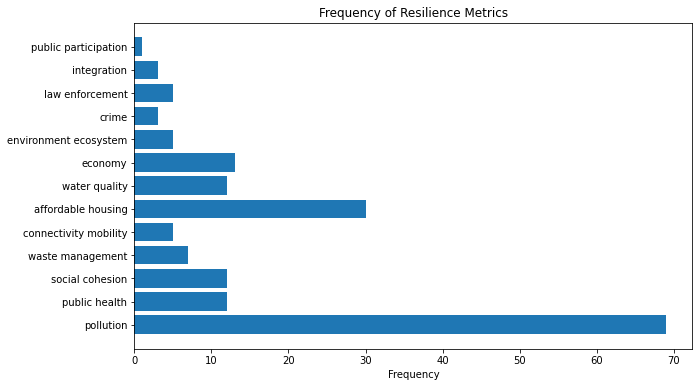

In [167]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the frequency of each resilience metric
frequency_resilience = Counter(resilience_metrics)

# Create a bar plot of the frequencies
plt.figure(figsize=(10, 6))
plt.barh(list(frequency_resilience.keys()), list(frequency_resilience.values()))
plt.xlabel('Frequency')
plt.title('Frequency of Resilience Metrics')
plt.show()

In [168]:
!pip install torch
!pip install transformers

In [169]:
from transformers import pipeline
import pandas as pd
import nltk
nltk.download('punkt')

# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')

# Tokenize the Surat text into sentences
surat_sentences = nltk.tokenize.sent_tokenize(Surat_text.lower())

# Define resilience metrics
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 'public health', 'pollution']

# Convert resilience metrics to lower case
resilience_metrics = [metric.lower() for metric in resilience_metrics]

# Initialize an empty list to hold the results
results = []

# Analyze the sentiment of each sentence containing a resilience metric
for sentence in surat_sentences:
    if any(metric in nltk.tokenize.word_tokenize(sentence) for metric in resilience_metrics):
        # Split long sentences into chunks of 512 tokens
        sentence_chunks = [sentence[i:i+512] for i in range(0, len(sentence), 512)]
        for chunk in sentence_chunks:
            result = sentiment_analyzer(chunk)
            results.append([chunk, result[0]['label'], result[0]['score']])

# Convert the results list to a DataFrame
df = pd.DataFrame(results, columns=['Sentence', 'Sentiment', 'Score'])

# Print the DataFrame
print(df)

df.to_csv('sentiment_analysis_results.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             Sentence Sentiment     Score
0   the city invites all allies to act for, and co...  POSITIVE  0.998330
1   nd orientation\nsurat resilience pillars, goal...  NEGATIVE  0.929081
2   of real estate developers’ associations of ind...  NEGATIVE  0.958493
3   ion system\ngmfb gujarat municipal finance boa...  NEGATIVE  0.983544
4   inistry of health and family welfare\nmoud min...  NEGATIVE  0.968988
..                                                ...       ...       ...
86  brief\ngreen cover in the city leads to cleane...  NEGATIVE  0.996489
87  this further increases the stress on the city’...  POSITIVE  0.991987
88  surat is said to have lost its unique culture,...  NEGATIVE  0.999743
89  ‘city resilience strategy’ central pollution c...  NEGATIVE  0.514001
90  http:/ /censusindia.gov.in/\ngujarat pollution...  NEGATIVE  0.976134

[91 rows x 3 columns]


In [170]:
# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')

# Tokenize the Surat text into words
surat_words = nltk.tokenize.word_tokenize(Surat_text.lower())

# Define resilience metrics
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 'public health', 'pollution']

# Convert resilience metrics to lower case
resilience_metrics = [metric.lower() for metric in resilience_metrics]

# Initialize an empty list to hold the results
results = []

# Analyze the sentiment of each word that is a resilience metric
for word in surat_words:
    if word in resilience_metrics:
        result = sentiment_analyzer(word)
        results.append([word, result[0]['label'], result[0]['score']])

# Convert the results list to a DataFrame
df = pd.DataFrame(results, columns=['Word', 'Sentiment', 'Score'])

df = df.drop_duplicates()

# Print the DataFrame
print(df)


           Word Sentiment     Score
0     pollution  NEGATIVE  0.999501
3       economy  POSITIVE  0.998665
9         crime  NEGATIVE  0.993622
11  integration  POSITIVE  0.999180


#### LDA Model - Topic modeling top 10

In [171]:

from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
import numpy as np
np.random.seed(153)

def lemmatize(Surat_text):
    return WordNetLemmatizer().lemmatize(Surat_text, pos='v')

def preprocess(Surat_text):
    result = []
    for token in simple_preprocess(Surat_text):
        if token not in STOPWORDS and len(token) > 3:
            result.append(lemmatize(token))
    return result

# Preprocess the text
processed_docs = [preprocess(doc) for doc in preprocessed_sentences]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(processed_docs)

# Filter out words that occur less than 10 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=10, no_above=0.5)

# Create Bag-of-words representation of the documents
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=5)

# Print the Keyword in the 10 topics
lda_model.print_topics()


[(0,
  '0.049*"city" + 0.030*"percent" + 0.025*"water" + 0.023*"issue" + 0.022*"challenge" + 0.020*"support" + 0.020*"sector" + 0.018*"initiative" + 0.016*"vehicle" + 0.016*"economy"'),
 (1,
  '0.092*"water" + 0.054*"supply" + 0.043*"surat" + 0.042*"technology" + 0.039*"engineer" + 0.024*"department" + 0.022*"city" + 0.017*"tapi" + 0.017*"institute" + 0.015*"opportunity"'),
 (2,
  '0.075*"surat" + 0.063*"water" + 0.044*"corporation" + 0.042*"municipal" + 0.036*"city" + 0.024*"department" + 0.021*"strategy" + 0.019*"development" + 0.019*"cell" + 0.017*"pollution"'),
 (3,
  '0.086*"city" + 0.028*"industrial" + 0.026*"surat" + 0.025*"water" + 0.023*"area" + 0.021*"increase" + 0.020*"monitor" + 0.020*"pollution" + 0.019*"policy" + 0.019*"flood"'),
 (4,
  '0.083*"city" + 0.072*"surat" + 0.040*"traffic" + 0.029*"road" + 0.020*"transport" + 0.019*"state" + 0.019*"policy" + 0.018*"initiative" + 0.016*"smart" + 0.016*"public"'),
 (5,
  '0.097*"resilience" + 0.065*"health" + 0.047*"surat" + 0.04

In [172]:
from gensim.models import Word2Vec

# Train a Word2Vec model
model = Word2Vec(processed_docs, min_count=1)

# Vector for challenge
resilience_vector = model.wv['pollution']

# Similar word for challenge
similar_words = model.wv.most_similar('pollution', topn=20)

similar_words

[('water', 0.9981075525283813),
 ('city', 0.9979384541511536),
 ('house', 0.9979171752929688),
 ('policy', 0.9977526068687439),
 ('strategy', 0.9977331757545471),
 ('area', 0.9977086186408997),
 ('initiative', 0.997701108455658),
 ('development', 0.9976683259010315),
 ('surat', 0.9976205825805664),
 ('project', 0.9974512457847595),
 ('technology', 0.9974464774131775),
 ('gujarat', 0.9973981976509094),
 ('urban', 0.9972755908966064),
 ('monitor', 0.9972470998764038),
 ('supply', 0.9972260594367981),
 ('resilience', 0.9972047805786133),
 ('develop', 0.9971882700920105),
 ('transport', 0.9971561431884766),
 ('awareness', 0.9971476197242737),
 ('traffic', 0.9971411228179932)]

In [173]:
def preprocess_modified(Surat_text):
    result = []
    for token in simple_preprocess(Surat_text):
        if token not in STOPWORDS:
            result.append(lemmatize(token))
    return result

# Preprocess the text with modified preprocessing function
processed_docs_modified = [preprocess_modified(doc) for doc in preprocessed_sentences]

# Train a Word2Vec model with modified preprocessing
model_modified = Word2Vec(processed_docs_modified, min_count=1)

# Try to get the vector for 'resilience'
try:
    resilience_vector_modified = model_modified.wv['pollution']
    similar_words_modified = model_modified.wv.most_similar('pollution', topn=20)
except KeyError:
    similar_words_modified = 'The word resilience is still not in the vocabulary.'

similar_words_modified


[('mr', 0.9985222816467285),
 ('surat', 0.998332142829895),
 ('water', 0.998282790184021),
 ('develop', 0.9980896711349487),
 ('city', 0.9980677366256714),
 ('road', 0.9979066252708435),
 ('quality', 0.9978652000427246),
 ('increase', 0.99785977602005),
 ('area', 0.9978529214859009),
 ('supply', 0.997804582118988),
 ('urban', 0.9977410435676575),
 ('river', 0.9977117776870728),
 ('resilience', 0.9977024793624878),
 ('initiative', 0.9976962804794312),
 ('support', 0.9976732134819031),
 ('policy', 0.997671365737915),
 ('build', 0.9976514577865601),
 ('affordable', 0.9976335167884827),
 ('house', 0.9976291656494141),
 ('research', 0.9976235628128052)]

In [174]:
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')


In [175]:
try:
    resilience_vector_glove = glove_model['pollution']
    similar_words_glove = glove_model.most_similar('pollution', topn=10)
except KeyError:
    similar_words_glove = 'The word resilience is still not in the vocabulary.'

similar_words_glove

[('emissions', 0.6847870945930481),
 ('pollutants', 0.6770709753036499),
 ('environmental', 0.6384705901145935),
 ('smog', 0.6194671988487244),
 ('polluted', 0.6174101233482361),
 ('dioxide', 0.597844123840332),
 ('pollutant', 0.5828356146812439),
 ('carbon', 0.5641278624534607),
 ('greenhouse', 0.5608704686164856),
 ('emission', 0.5505319833755493)]

In [176]:
!pip install -q scikit-learn

In [177]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the resilience metrics
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 'public health', 'pollution']

# Create a DataFrame from the resilience metrics
df = pd.DataFrame({'Resilience Metrics': resilience_metrics})

# Remove duplicates
df = df.drop_duplicates()
print(df)

# Convert the text and the resilience metrics to lower case
Surat_text_lower = Surat_text.lower()
resilience_metrics_lower = [metric.lower() for metric in resilience_metrics]

# Initialize the TfidfVectorizer with the lower case resilience metrics and ngram_range set to (1, 2)
vectorizer = TfidfVectorizer(vocabulary=resilience_metrics_lower, ngram_range=(1, 2))

# Fit and transform the vectorizer on the lower case Surat text
X = vectorizer.fit_transform([Surat_text_lower])

# Get the feature names and the TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
scores = X.toarray()[0]

# Combining feature names and scores
features_scores = list(zip(feature_names, scores))

# Sort tuple list by score in descending order
features_scores_sorted = sorted(features_scores, key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted feature scores
df = pd.DataFrame(features_scores_sorted, columns=['Term', 'TF-IDF Score'])
df


       Resilience Metrics
0    public participation
1             integration
2         law enforcement
3                   crime
4   environment ecosystem
5                 economy
6           water quality
7      affordable housing
8   connectivity mobility
9        waste management
10        social cohesion
11          public health
12              pollution


,Term,TF-IDF Score
0,pollution,0.832656
1,affordable housing,0.434429
2,water quality,0.181012
3,economy,0.168945
4,social cohesion,0.144810
5,public health,0.144810
6,waste management,0.084472
7,law enforcement,0.060337
8,crime,0.048270
9,integration,0.036202


Seattle Resilience Strategy

In [178]:
import requests
from PyPDF2 import PdfReader

def download_and_extract_text(url, output_pdf_file):
    # Download the file
    response = requests.get(url)
    with open(output_pdf_file, 'wb') as f:
        f.write(response.content)

    # Extract text from the downloaded PDF
    with open(output_pdf_file, 'rb') as f:
        reader = PdfReader(f)
        text = ''
        for page in reader.pages:
            text += page.extract_text()

    return text


In [179]:
url = 'https://resilientcitiesnetwork.org/downloadable_resources/Network/Seattle-Resilience-Strategy-English.pdf'
output_pdf_file = 'Seattle-Resilience-Strategy-English.pdf'

Seattle_text = download_and_extract_text(url, output_pdf_file)
print(Seattle_text)


SEATTLE—
FUTURE CITY:
RESILIENCE  
ROADMAPSEATTLE—
FUTURE CITY:
RESILIENCE  
ROADMAP
FRAMEWORK:  
4 CHAPTERS,  
15 GOALS,  
69 ACTIONS.5
CHAPTER 1  
BUILDING  
OPPORTUNITYGOAL 1
Closing the Opportunity GapPAGE 18
GOAL 2
Creating Pathways to JobsPAGE 22
GOAL 3
Prepare All Seattle Workers for the Jobs of the Future PAGE 26
CHAPTER 2  
MAKING SEATTLE MORE  
AFFORDABLE FOR ALLGOAL 4
Building More Affordable Housing PAGE 32
GOAL 5
Preventing DisplacementPAGE 38
GOAL 6
Creating a Connected and Affordable Transportation NetworkPAGE 44
GOAL 7
Helping Residents Meet their Basic NeedsPAGE 48
CHAPTER 3  
CREATING A CITY WHERE 
EVERYONE IS WELCOME GOAL 8
Correcting Historic Injustices in the Criminal Justice SystemPAGE 54
GOAL 9
Protecting Our Most Vulnerable CommunitiesPAGE 60
GOAL 10
Standing Up for All of Seattle’s WorkersPAGE 64
CHAPTER 4  
FOSTERING  
GENERATIONAL  
INVESTMENTSGOAL 11
Serving As A Model Employer By Driving Equitable OutcomesPAGE 68
GOAL 12
Re-imagining and Enhancing Our Civic

In [180]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize a WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a list of stopwords to be removed from the text
stop_words = set(stopwords.words('english'))

# Tokenize the text into sentences
sentences = sent_tokenize(Seattle_text)

# Initialize an empty list to hold the preprocessed sentences
preprocessed_sentences_Seattle = []

# Loop through each sentence
for sentence in sentences:
    # Remove punctuation and convert to lowercase
    sentence = sentence.translate(str.maketrans('', '', string.punctuation)).lower()

    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Remove stopwords and lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Add the preprocessed sentence to the list
    preprocessed_sentences_Seattle.append(' '.join(words))

# Now 'preprocessed_sentences' contains the preprocessed text
preprocessed_sentences_Seattle

print(preprocessed_sentences_Seattle)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['seattle— future city resilience roadmapseattle— future city resilience roadmap framework 4 chapter 15 goal 69 actions5 chapter 1 building opportunitygoal 1 closing opportunity gappage 18 goal 2 creating pathway jobspage 22 goal 3 prepare seattle worker job future page 26 chapter 2 making seattle affordable allgoal 4 building affordable housing page 32 goal 5 preventing displacementpage 38 goal 6 creating connected affordable transportation networkpage 44 goal 7 helping resident meet basic needspage 48 chapter 3 creating city everyone welcome goal 8 correcting historic injustice criminal justice systempage 54 goal 9 protecting vulnerable communitiespage 60 goal 10 standing seattle ’ workerspage 64 chapter 4 fostering generational investmentsgoal 11 serving model employer driving equitable outcomespage 68 goal 12 reimagining enhancing civic treasurespage 74 goal 13 meeting need growing citypage 78 goal 14 combatting climate change page 82 goal 15 harnessing power partnershipspage 866 m

In [181]:
from summarizer import Summarizer

# Initialize the BERT summarizer
model = Summarizer()

# Summarize the Surat_text
summary = model(Seattle_text, num_sentences=3) # You can adjust num_sentences to control the length of the summary

print("Summary of Seattle Resilience Report:")
print(summary)


Summary of Seattle Resilience Report:
We want to ensure that our city 
continues to be a place where everyone feels welcome and 
safe. PREPARE ALL  
SEATTLE WORKERS  
FOR THE JOBS  
OF THE FUTURE 
FUTURE OF WORK 
SUB-CABINET
The City’s Future of Work Subcab-
inet focuses on building a robust 
local talent pipeline, creating 
sustainable opportunities for 
Seattle’s youth, and addressing the 
challenges facing Seattle and its 
residents from increasing automa-
tion. WORK TO DEVELOP AN EARTHQUAKE EARLY WARNING 
SYSTEM AND EXPLORE OPPORTUNITIES TO RETROFIT 
UNREINFORCED MASONRY BUILDINGS9.2
Seattle has an estimated 1,164 Unre-
inforced Masonry Buildings (URMs) 
throughout the city and they have 
long been identified as a significant 
threat to public safety in the event of 
an earthquake.


In [182]:
import spacy
from spacy.matcher import Matcher

# Load the Spacy model
nlp = spacy.load('en_core_web_sm')

# Initialize a Spacy Matcher
matcher = Matcher(nlp.vocab)

# Define patterns for the resilience metrics
patterns = [
    [{'LOWER': 'healthcare'}, {'LOWER': 'facilities'}],
    [{'LOWER': 'clean'}, {'LOWER': 'water'}],
    [{'LOWER': 'nutritious'}, {'LOWER': 'food'}],
    [{'LOWER': 'employment'}, {'LOWER': 'opportunities'}],
    [{'LOWER': 'income'}, {'LOWER': 'equality'}],
    [{'LOWER': 'public'}, {'LOWER': 'health'}, {'LOWER': 'policies'}],
    [{'LOWER': 'crime'}],
    [{'LOWER': 'economic'}, {'LOWER': 'diversity'}],
    [{'LOWER': 'local'}, {'LOWER': 'economy'}],
    [{'LOWER': 'law'}, {'LOWER': 'enforcement'}],
    [{'LOWER': 'social'}, {'LOWER': 'cohesion'}],
    [{'LOWER': 'social'}, {'LOWER': 'inequality'}],
    [{'LOWER': 'dispute'}, {'LOWER': 'resolution'}],
    [{'LOWER': 'transportation'}, {'LOWER': 'infrastructure'}],
    [{'LOWER': 'internet'}, {'LOWER': 'access'}],
    [{'LOWER': 'utilities'}],
    [{'LOWER': 'waste'}, {'LOWER': 'management'}],
    [{'LOWER': 'natural'}, {'LOWER': 'resources'}],
    [{'LOWER': 'environmental'}, {'LOWER': 'regulations'}],
    [{'LOWER': 'government'}, {'LOWER': 'leadership'}],
    [{'LOWER': 'corruption'}],
    [{'LOWER': 'public'}, {'LOWER': 'participation'}],
    [{'LOWER': 'education'}, {'LOWER': 'and'}, {'LOWER': 'training'}],
    [{'LOWER': 'urban'}, {'LOWER': 'planning'}],
    [{'LOWER': 'integration'}],
    [{'LOWER': 'connectivity'}, {'LOWER': 'mobility'}],
    [{'LOWER': 'affordable'}, {'LOWER': 'housing'}],
    [{'LOWER': 'economy'}],
    [{'LOWER': 'environment'}, {'LOWER': 'ecosystem'}],
    [{'LOWER': 'social'}, {'LOWER': 'cohesion'}],
    [{'LOWER': 'public'}, {'LOWER': 'health'}],
    [{'LOWER': 'water'}, {'LOWER': 'quality'}],
    [{'LOWER': 'water'}, {'LOWER': 'quantity'}],
    [{'LOWER': 'pollution'}],
    [{'LOWER': 'education'}],
    [{'LOWER': 'Health Services'}],
    [{'LOWER': 'Workforce Development'}],
    [{'LOWER': 'Youth Opportunity Programs'}],
    [{'LOWER': 'Job and Skill Building Opportunities'}]
]

# Add the patterns to the matcher
matcher.add('RESILIENCE_METRICS', patterns)

# Initialize an empty list to hold the matched resilience metrics
resilience_metrics_Seattle = []

# Loop through each preprocessed sentence
for sentence in preprocessed_sentences_Seattle:
    # Convert the sentence to a Spacy Doc
    doc = nlp(sentence)

    # Find matches in the doc
    matches = matcher(doc)

    # Loop through each match
    for match_id, start, end in matches:
        # Get the matched span
        span = doc[start:end]

        # Add the matched resilience metric to the list
        resilience_metrics_Seattle.append(span.text)

resilience_metrics_Seattle




['affordable housing',
 'affordable housing',
 'affordable housing',
 'education',
 'economy',
 'affordable housing',
 'education',
 'education',
 'affordable housing',
 'economy',
 'affordable housing',
 'economy',
 'affordable housing',
 'education',
 'education',
 'education',
 'education',
 'education',
 'education',
 'education',
 'education',
 'education',
 'education',
 'economy',
 'education',
 'education',
 'education',
 'education',
 'public health',
 'education',
 'economy',
 'education',
 'economy',
 'economy',
 'economy',
 'economy',
 'economy',
 'education',
 'economy',
 'economy',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'public health',
 'public health',
 'public health',
 'education',
 'affordable housing',
 'economy',
 'education',
 'ed

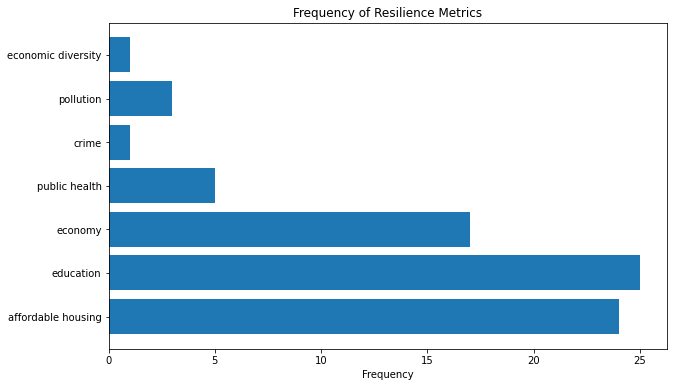

In [183]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the frequency of each resilience metric
frequency_resilience = Counter(resilience_metrics_Seattle)

# Create a bar plot of the frequencies
plt.figure(figsize=(10, 6))
plt.barh(list(frequency_resilience.keys()), list(frequency_resilience.values()))
plt.xlabel('Frequency')
plt.title('Frequency of Resilience Metrics')
plt.show()

In [184]:
# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')

# Tokenize the Surat text into words
Seattle_words = nltk.tokenize.word_tokenize(Seattle_text.lower())

# Define resilience metrics
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 
                      'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 
                      'public health', 'pollution', 'education', 'health services', 'workforce development', 'youth opportunity programs']

# Convert resilience metrics to lower case
resilience_metrics = [metric.lower() for metric in resilience_metrics]

# Initialize an empty list to hold the results
results = []

# Analyze the sentiment of each word that is a resilience metric
for word in Seattle_words:
    if word in resilience_metrics:
        result = sentiment_analyzer(word)
        results.append([word, result[0]['label'], result[0]['score']])

# Convert the results list to a DataFrame
df = pd.DataFrame(results, columns=['Word', 'Sentiment', 'Score'])

df = df.drop_duplicates()

# Print the DataFrame
print(df)


         Word Sentiment     Score
0   education  POSITIVE  0.998959
1     economy  POSITIVE  0.998665
35      crime  NEGATIVE  0.993622
41  pollution  NEGATIVE  0.999501


In [185]:
from transformers import pipeline
import pandas as pd
import nltk
nltk.download('punkt')

# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')

# Tokenize the Surat text into sentences
seattle_sentences = nltk.tokenize.sent_tokenize(Seattle_text.lower())

# Define resilience metrics
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 'public health', 'pollution'
                      'education', 'health services', 'workforce development', 'youth opportunity programs']

# Convert resilience metrics to lower case
resilience_metrics = [metric.lower() for metric in resilience_metrics]

# Initialize an empty list to hold the results
results = []

# Analyze the sentiment of each sentence containing a resilience metric
for sentence in seattle_sentences:
    if any(metric in nltk.tokenize.word_tokenize(sentence) for metric in resilience_metrics):
        # Split long sentences into chunks of 512 tokens
        sentence_chunks = [sentence[i:i+512] for i in range(0, len(sentence), 512)]
        for chunk in sentence_chunks:
            result = sentiment_analyzer(chunk)
            results.append([chunk, result[0]['label'], result[0]['score']])

# Convert the results list to a DataFrame
df = pd.DataFrame(results, columns=['Sentence', 'Sentiment', 'Score'])

# Print the DataFrame
print(df)

df.to_csv('sentiment_analysis_results.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             Sentence Sentiment     Score
0   5\nwhile an abundant natural resource base, en...  NEGATIVE  0.944771
1   to this end, this resilience roadmap will focu...  POSITIVE  0.997108
2   they will elevate investment strategies and in...  POSITIVE  0.996984
3   it will \nhelp channel the prosperity of our t...  POSITIVE  0.999744
4   create and support career \npathways for new e...  POSITIVE  0.993164
5                         ople to connect to careers.  POSITIVE  0.999635
6   workers in the platform economy \nexperience p...  NEGATIVE  0.999472
7   specifically, the city has \nworked with the u...  POSITIVE  0.998594
8                             lies, \nand themselves.  NEGATIVE  0.997011
9   these same gig \neconomy jobs have also introd...  NEGATIVE  0.775377
10  the office of labor standards, office \nof eco...  POSITIVE  0.886825
11  recommendations may include \nclarifying labor...  POSITIVE  0.998694
12  \nthat aims to dramatically \nimpr

In [186]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the resilience metrics
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 'public health', 'pollution',
                      'education', 'health services', 'workforce development', 'youth opportunity programs']

# Create a DataFrame from the resilience metrics
df = pd.DataFrame({'Resilience Metrics': resilience_metrics})

# Remove duplicates
df = df.drop_duplicates()
print(df)

# Convert the text and the resilience metrics to lower case
Seattle_text_lower = Seattle_text.lower()
resilience_metrics_lower = [metric.lower() for metric in resilience_metrics]

# Initialize the TfidfVectorizer with the lower case resilience metrics and ngram_range set to (1, 2)
vectorizer = TfidfVectorizer(vocabulary=resilience_metrics_lower, ngram_range=(1, 2))

# Fit and transform the vectorizer on the lower case Surat text
X = vectorizer.fit_transform([Seattle_text_lower])

# Get the feature names and the TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
scores = X.toarray()[0]

# Combining feature names and scores
features_scores = list(zip(feature_names, scores))

# Sort tuple list by score in descending order
features_scores_sorted = sorted(features_scores, key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted feature scores
df = pd.DataFrame(features_scores_sorted, columns=['Term', 'TF-IDF Score'])
df


            Resilience Metrics
0         public participation
1                  integration
2              law enforcement
3                        crime
4        environment ecosystem
5                      economy
6                water quality
7           affordable housing
8        connectivity mobility
9             waste management
10             social cohesion
11               public health
12                   pollution
13                   education
14             health services
15       workforce development
16  youth opportunity programs


,Term,TF-IDF Score
0,education,0.629541
1,affordable housing,0.604360
2,economy,0.453270
3,public health,0.125908
4,health services,0.100727
5,pollution,0.075545
6,crime,0.025182
7,workforce development,0.025182
8,public participation,0.000000
9,integration,0.000000


In [187]:
# Define the documents
documents = [Seattle_text, Surat_text]

# Define the resilience metrics as bag of words
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 'public health', 'pollution', 'education', 'health services', 'workforce development', 'youth opportunity programs']

# Create the Document Term Matrix using the resilience metrics as vocabulary
tfidf = TfidfVectorizer(vocabulary=resilience_metrics)
response = tfidf.fit_transform(documents)

# Create a DataFrame
df = pd.DataFrame(response.toarray(), columns=tfidf.get_feature_names_out(), index=['Seattle', 'Surat'])

# Print the DataFrame
print(df)


         public participation  integration  law enforcement     crime  \
Seattle                   0.0     0.000000              0.0  0.032292   
Surat                     0.0     0.054075              0.0  0.051300   

         environment ecosystem   economy  water quality  affordable housing  \
Seattle                    0.0  0.581250            0.0                 0.0   
Surat                      0.0  0.179549            0.0                 0.0   

         connectivity mobility  waste management  social cohesion  \
Seattle                    0.0               0.0              0.0   
Surat                      0.0               0.0              0.0   

         public health  pollution  education  health services  \
Seattle            0.0   0.096875   0.807292              0.0   
Surat              0.0   0.884922   0.423224              0.0   

         workforce development  youth opportunity programs  
Seattle                    0.0                         0.0  
Surat           

In [188]:

!pip install bert-extractive-summarizer



Athens Resilience Metric

In [189]:
url = 'https://resilientcitiesnetwork.org/downloadable_resources/Network/Athens-Resilience-Strategy-English.pdf'
output_pdf_file = 'Athens-Resilience-Strategy-English.pdf'

Athens_text = download_and_extract_text(url, output_pdf_file)
print(Athens_text)



@Resilient Athens
Athens  
Resilience Strategy 
for 2030Redefining the city
Open Proactive Green Vibrant Open Green Vibrant ProactiveTable of Contents
Executive Summary   4
 Let ter from the Mayor  
 Let ter from Michael Berkowitz  
 Let ter from the CRO  
Introduction                                                                                                10
 Why a r esilience Strategy?  
 Urb an Resilience and 100 Resilient Cities  
 Ath ens’ Resilience challenges  
 Abo ut 100 RC  
 Cit y Resilience Framework  
Vision for a Resilient Athens   18
Athens and Resilience   20
 A sho rt genealogy  
 Ath ens city profile and context  
 cit y milestones                                                                                           
 Bui lding a resilience strategy 
 Lin king the resilience strategy with other plans in Athens                                                                    
 Athen s’ resilience journey                                                      

In [190]:
with open('Athens_text.txt', 'w', encoding='utf-8') as f:
    f.write(Athens_text)

In [191]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize a WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a list of stopwords to be removed from the text
stop_words = set(stopwords.words('english'))

# Tokenize the text into sentences
sentences = sent_tokenize(Athens_text)

# Initialize an empty list to hold the preprocessed sentences
preprocessed_sentences_Athens = []

# Loop through each sentence
for sentence in sentences:
    # Remove punctuation and convert to lowercase
    sentence = sentence.translate(str.maketrans('', '', string.punctuation)).lower()

    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Remove stopwords and lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Add the preprocessed sentence to the list
    preprocessed_sentences_Athens.append(' '.join(words))

# Now 'preprocessed_sentences' contains the preprocessed text
preprocessed_sentences_Athens

print(preprocessed_sentences_Athens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['resilient athens athens resilience strategy 2030redefining city open proactive green vibrant open green vibrant proactivetable content executive summary 4 let ter mayor let ter michael berkowitz let ter cro introduction 10 r esilience strategy', 'urb resilience 100 resilient city ath en ’ resilience challenge abo ut 100 rc cit resilience framework vision resilient athens 18 athens resilience 20 sho rt genealogy ath en city profile context cit milestone bui lding resilience strategy lin king resilience strategy plan athens athen ’ resilience journey pillar goal action 40 str ategy hierarchy 1', 'pen city 2', 'gr een city 3', 'pro active city 4', 'vi brant city cit case study inspiration wor king partner stakeholder role implementation 200 glossary acknowledgment 210 appendix 2144 executive summaryexecutive summary © municipality athens5 city athens venerable yet intricate city near 700000 resident part 375 million people metropolis several year facing serious socioeconomic crisis', 'c

In [192]:
from collections import Counter
import re

# Tokenize the text using regular expressions
words = re.findall(r'\w+', Athens_text.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Optionally, filter out stopwords (common words like 'and', 'the', etc.)
stopwords = set(["and", "the", "a", "in", "to", "of"]) # Add more stopwords as needed
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords}

# Sort by frequency
sorted_word_counts = sorted(filtered_word_counts.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words
for word, count in sorted_word_counts[:10]: # Top 10
    print(word, count)


city 1080
athens 867
for 616
with 402
1 343
action 334
as 330
is 316
that 313
municipal 311


In [193]:
import spacy
from spacy.matcher import Matcher

# Load the Spacy model
nlp = spacy.load('en_core_web_sm')

# Initialize a Spacy Matcher
matcher = Matcher(nlp.vocab)

# Define patterns for the resilience metrics
patterns = [
    [{'LOWER': 'healthcare'}, {'LOWER': 'facilities'}],
    [{'LOWER': 'clean'}, {'LOWER': 'water'}],
    [{'LOWER': 'nutritious'}, {'LOWER': 'food'}],
    [{'LOWER': 'employment'}, {'LOWER': 'opportunities'}],
    [{'LOWER': 'income'}, {'LOWER': 'equality'}],
    [{'LOWER': 'public'}, {'LOWER': 'health'}, {'LOWER': 'policies'}],
    [{'LOWER': 'crime'}],
    [{'LOWER': 'economic'}, {'LOWER': 'diversity'}],
    [{'LOWER': 'local'}, {'LOWER': 'economy'}],
    [{'LOWER': 'law'}, {'LOWER': 'enforcement'}],
    [{'LOWER': 'social'}, {'LOWER': 'cohesion'}],
    [{'LOWER': 'social'}, {'LOWER': 'inequality'}],
    [{'LOWER': 'dispute'}, {'LOWER': 'resolution'}],
    [{'LOWER': 'transportation'}, {'LOWER': 'infrastructure'}],
    [{'LOWER': 'internet'}, {'LOWER': 'access'}],
    [{'LOWER': 'utilities'}],
    [{'LOWER': 'waste'}, {'LOWER': 'management'}],
    [{'LOWER': 'natural'}, {'LOWER': 'resources'}],
    [{'LOWER': 'environmental'}, {'LOWER': 'regulations'}],
    [{'LOWER': 'government'}, {'LOWER': 'leadership'}],
    [{'LOWER': 'corruption'}],
    [{'LOWER': 'public'}, {'LOWER': 'participation'}],
    [{'LOWER': 'education'}, {'LOWER': 'and'}, {'LOWER': 'training'}],
    [{'LOWER': 'urban'}, {'LOWER': 'planning'}],
    [{'LOWER': 'integration'}],
    [{'LOWER': 'connectivity'}, {'LOWER': 'mobility'}],
    [{'LOWER': 'affordable'}, {'LOWER': 'housing'}],
    [{'LOWER': 'economy'}],
    [{'LOWER': 'environment'}, {'LOWER': 'ecosystem'}],
    [{'LOWER': 'social'}, {'LOWER': 'cohesion'}],
    [{'LOWER': 'public'}, {'LOWER': 'health'}],
    [{'LOWER': 'water'}, {'LOWER': 'quality'}],
    [{'LOWER': 'water'}, {'LOWER': 'quantity'}],
    [{'LOWER': 'pollution'}],
    [{'LOWER': 'education'}],
    [{'LOWER': 'Health Services'}],
    [{'LOWER': 'Workforce Development'}],
    [{'LOWER': 'Youth Opportunity Programs'}],
    [{'LOWER': 'Job and Skill Building Opportunities'}],
    [{'LOWER': 'heat'}],
    [{'LOWER': 'Green Housing'}],
    [{'LOWER': 'Sustainable Growth'}],
    [{'LOWER': 'Climate'}],
    [{'LOWER': 'Climate Change Adaption'}],
    [{'LOWER': 'Green Spaces'}],
    [{'LOWER': 'Economic Stability'}],
    [{'LOWER': 'Cultural Heritage Preservation'}],
    [{'LOWER': 'Emergency Preparedness'}]
]

# Add the patterns to the matcher
matcher.add('RESILIENCE_METRICS', patterns)

# Initialize an empty list to hold the matched resilience metrics
resilience_metrics_Athens = []

# Loop through each preprocessed sentence
for sentence in preprocessed_sentences_Athens:
    # Convert the sentence to a Spacy Doc
    doc = nlp(sentence)

    # Find matches in the doc
    matches = matcher(doc)

    # Loop through each match
    for match_id, start, end in matches:
        # Get the matched span
        span = doc[start:end]

        # Add the matched resilience metric to the list
        resilience_metrics_Athens.append(span.text)

resilience_metrics_Athens




['heat',
 'economy',
 'heat',
 'heat',
 'social cohesion',
 'economy',
 'economy',
 'heat',
 'waste management',
 'integration',
 'urban planning',
 'heat',
 'heat',
 'heat',
 'heat',
 'heat',
 'heat',
 'education',
 'economy',
 'corruption',
 'economy',
 'public health',
 'urban planning',
 'education',
 'social cohesion',
 'heat',
 'heat',
 'heat',
 'heat',
 'heat',
 'heat',
 'social cohesion',
 'pollution',
 'heat',
 'heat',
 'heat',
 'heat',
 'heat',
 'integration',
 'heat',
 'pollution',
 'economy',
 'waste management',
 'economy',
 'economy',
 'crime',
 'pollution',
 'social cohesion',
 'heat',
 'heat',
 'integration',
 'social cohesion',
 'urban planning',
 'waste management',
 'integration',
 'integration',
 'education',
 'economy',
 'integration',
 'waste management',
 'economy',
 'integration',
 'waste management',
 'social cohesion',
 'heat',
 'heat',
 'heat',
 'waste management',
 'economy',
 'waste management',
 'integration',
 'public health',
 'waste management',
 'integ

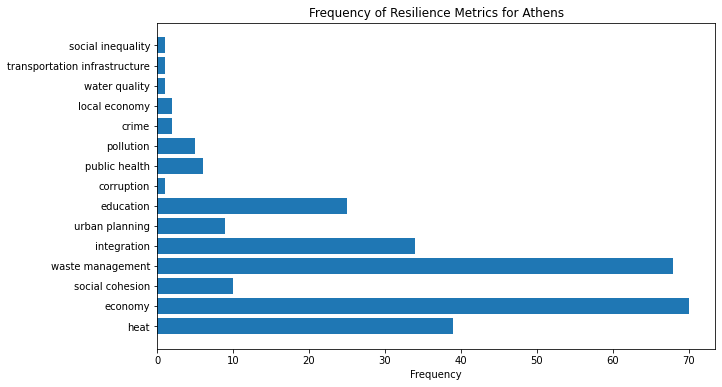

In [194]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the frequency of each resilience metric
frequency_resilience = Counter(resilience_metrics_Athens)

# Create a bar plot of the frequencies
plt.figure(figsize=(10, 6))
plt.barh(list(frequency_resilience.keys()), list(frequency_resilience.values()))
plt.xlabel('Frequency')
plt.title('Frequency of Resilience Metrics for Athens')
plt.show()

In [195]:
# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')

# Tokenize the Surat text into words
Athens_words = nltk.tokenize.word_tokenize(Athens_text.lower())

# Define resilience metrics
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 
                      'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 
                      'public health', 'pollution', 'education', 'health services', 'workforce development', 'youth opportunity programs',
                      'heat', 'Green housing','Sustainable Growth', 'Climate', 'Climate change adaption', 'Green spaces', 'economic stability',
                      'Cultural heritage preservation', 'emergency preparedness']

# Convert resilience metrics to lower case
resilience_metrics = [metric.lower() for metric in resilience_metrics]

# Initialize an empty list to hold the results
results = []

# Analyze the sentiment of each word that is a resilience metric
for word in Athens_words:
    if word in resilience_metrics:
        result = sentiment_analyzer(word)
        results.append([word, result[0]['label'], result[0]['score']])

# Convert the results list to a DataFrame
df = pd.DataFrame(results, columns=['Word', 'Sentiment', 'Score'])

df = df.drop_duplicates()

# Print the DataFrame
print(df)


            Word Sentiment     Score
0           heat  POSITIVE  0.999369
1        climate  POSITIVE  0.997103
14   integration  POSITIVE  0.999180
25     education  POSITIVE  0.998959
26       economy  POSITIVE  0.998665
36     pollution  NEGATIVE  0.999501
174        crime  NEGATIVE  0.993622


In [196]:
from transformers import pipeline
import pandas as pd
import nltk
nltk.download('punkt')

# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')

# Tokenize the Surat text into sentences
Athens_sentences = nltk.tokenize.sent_tokenize(Athens_text.lower())

# Define resilience metrics
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 
                      'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 
                      'public health', 'pollution', 'education', 'health services', 'workforce development', 'youth opportunity programs',
                      'heat', 'Green housing','Sustainable Growth', 'Climate', 'Climate change adaption', 'Green spaces', 'economic stability',
                      'Cultural heritage preservation', 'emergency preparedness']

# Convert resilience metrics to lower case
resilience_metrics = [metric.lower() for metric in resilience_metrics]

# Initialize an empty list to hold the results
results = []

# Analyze the sentiment of each sentence containing a resilience metric
for sentence in Athens_sentences:
    if any(metric in nltk.tokenize.word_tokenize(sentence) for metric in resilience_metrics):
        # Split long sentences into chunks of 512 tokens
        sentence_chunks = [sentence[i:i+512] for i in range(0, len(sentence), 512)]
        for chunk in sentence_chunks:
            result = sentiment_analyzer(chunk)
            results.append([chunk, result[0]['label'], result[0]['score']])

# Convert the results list to a DataFrame
df = pd.DataFrame(results, columns=['Sentence', 'Sentiment', 'Score'])

# Print the DataFrame
print(df)
df.drop_duplicates()
df.to_csv('sentiment_analysis_results.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                              Sentence Sentiment     Score
0    this is vital for our densely built and popula...  POSITIVE  0.998416
1    finally the athens climate change adaptation a...  POSITIVE  0.997811
2    the city of \nthe future will meet our human n...  POSITIVE  0.999600
3    it addresses not only the city’s shocks, such ...  NEGATIVE  0.980274
4    the strategy’s four pillars -- open city, proa...  POSITIVE  0.999444
..                                                 ...       ...       ...
296  berg associates, major cultural institutionssh...  NEGATIVE  0.971692
297  creative economy ad -\nvisory boardcity of ath...  POSITIVE  0.958857
298  myathens proj -\nect: enhance education, caree...  POSITIVE  0.855069
299  explore elderly house potential uses city of a...  NEGATIVE  0.986384
300  \nation and greening of aban -\ndoned lots in ...  POSITIVE  0.815423

[301 rows x 3 columns]


In [197]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the resilience metrics
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 
                      'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 
                      'public health', 'pollution', 'education', 'health services', 'workforce development', 'youth opportunity programs',
                      'heat', 'Green housing','Sustainable Growth', 'Climate', 'Climate change adaption', 'Green spaces', 'economic stability',
                      'Cultural heritage preservation', 'emergency preparedness']

# Create a DataFrame from the resilience metrics
df = pd.DataFrame({'Resilience Metrics': resilience_metrics})

# Remove duplicates
df = df.drop_duplicates()
print(df)

# Convert the text and the resilience metrics to lower case
Athens_text_lower = Seattle_text.lower()
resilience_metrics_lower = [metric.lower() for metric in resilience_metrics]

# Initialize the TfidfVectorizer with the lower case resilience metrics and ngram_range set to (1, 2)
vectorizer = TfidfVectorizer(vocabulary=resilience_metrics_lower, ngram_range=(1, 2))

# Fit and transform the vectorizer on the lower case Surat text
X = vectorizer.fit_transform([Athens_text_lower])

# Get the feature names and the TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
scores = X.toarray()[0]

# Combining feature names and scores
features_scores = list(zip(feature_names, scores))

# Sort tuple list by score in descending order
features_scores_sorted = sorted(features_scores, key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted feature scores
df = pd.DataFrame(features_scores_sorted, columns=['Term', 'TF-IDF Score'])
df


                Resilience Metrics
0             public participation
1                      integration
2                  law enforcement
3                            crime
4            environment ecosystem
5                          economy
6                    water quality
7               affordable housing
8            connectivity mobility
9                 waste management
10                 social cohesion
11                   public health
12                       pollution
13                       education
14                 health services
15           workforce development
16      youth opportunity programs
17                            heat
18                   Green housing
19              Sustainable Growth
20                         Climate
21         Climate change adaption
22                    Green spaces
23              economic stability
24  Cultural heritage preservation
25          emergency preparedness


,Term,TF-IDF Score
0,climate,0.556258
1,education,0.515054
2,affordable housing,0.494451
3,economy,0.370839
4,heat,0.144215
5,public health,0.103011
6,health services,0.082409
7,pollution,0.061806
8,crime,0.020602
9,workforce development,0.020602


In [198]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Define the documents
documents = [Seattle_text, Surat_text, Athens_text]

# Define the resilience metrics as bag of words
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 
                      'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 
                      'public health', 'pollution', 'education', 'health services', 'workforce development', 'youth opportunity programs',
                      'heat', 'Green housing','Sustainable Growth', 'Climate', 'Climate change adaption', 'Green spaces', 'economic stability',
                      'Cultural heritage preservation', 'emergency preparedness']

# Create the Document Term Matrix using the resilience metrics as vocabulary
tfidf = TfidfVectorizer(vocabulary=resilience_metrics)
response = tfidf.fit_transform(documents)

# Create a DataFrame
df = pd.DataFrame(response.toarray(), columns=tfidf.get_feature_names_out(), index=['Seattle', 'Surat', 'Athens'])

# Print the DataFrame
print(df)


         public participation  integration  law enforcement     crime  \
Seattle                   0.0     0.000000              0.0  0.031497   
Surat                     0.0     0.049228              0.0  0.050973   
Athens                    0.0     0.471823              0.0  0.010469   

         environment ecosystem   economy  water quality  affordable housing  \
Seattle                    0.0  0.566947            0.0                 0.0   
Surat                      0.0  0.178407            0.0                 0.0   
Athens                     0.0  0.722357            0.0                 0.0   

         connectivity mobility  waste management  ...  \
Seattle                    0.0               0.0  ...   
Surat                      0.0               0.0  ...   
Athens                     0.0               0.0  ...   

         youth opportunity programs      heat  Green housing  \
Seattle                         0.0  0.220479            0.0   
Surat                           0

c:\Users\lifet\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1322: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [199]:
from transformers import AutoTokenizer, AutoModel
import torch
from scipy.spatial.distance import cosine

# Load the BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

# Function to calculate the embeddings of a text
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Calculate the embeddings for the documents
embeddings = [get_embedding(doc) for doc in documents]

# Calculate the cosine similarity between the embeddings of the documents
cosine_similarities = [[1 - cosine(embeddings[i], embeddings[j]) for j in range(len(documents))] for i in range(len(documents))]

# Create a DataFrame
df = pd.DataFrame(cosine_similarities, columns=['Seattle', 'Surat', 'Athens'], index=['Seattle', 'Surat', 'Athens'])

# Print the DataFrame
print(df)


          Seattle     Surat    Athens
Seattle  1.000000  0.710089  0.904874
Surat    0.710089  1.000000  0.764026
Athens   0.904874  0.764026  1.000000


Comparing Seattle and Surat: 
1. Common Terms: Both Seattle and Surat have the following terms in their resilience metrics: 'affordable housing', 'economy', 'public health', and 'pollution'. However, the importance of these terms varies between the two cities. For example, 'affordable housing' has a higher score in Seattle than in Surat, indicating that it is a more prominent topic in Seattle's resilience strategy.

2. Unique Terms: Some terms appear in one city's metrics but not in the other's. For instance, 'education', 'health services', 'workforce development', and 'youth opportunity programs' are present in Seattle's metrics but not in Surat's. On the other hand, 'water quality', 'social cohesion', 'waste management', 'law enforcement', 'integration', 'public participation', 'connectivity mobility', and 'environment ecosystem' are present in Surat's metrics but not in Seattle's.

3. Term Importance: The TF-IDF scores indicate the relative importance of each term in the city's resilience strategy. In Seattle, 'education' has the highest score, suggesting it's a major focus of their strategy. In Surat, 'pollution' has the highest score, suggesting it's a major focus there.

More analysis will be provided.